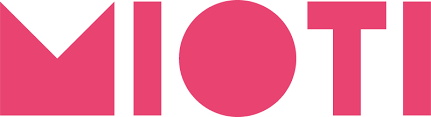
<center style="color:#888">Módulo Advanced Data Science<br/>Natural Language Processing</center>

# S1. Worksheet. Herramientas clásicas de NLP

In [1]:
import sys
# !{sys.executable} -m pip install -U nltk spacy sklearn

In [2]:
#! pip install -U nltk spacy sklearn

In [3]:
import nltk
import spacy
import sklearn

En este notebook vamos a repasar herramientas clásicas (usadas en modelos de machine learnin, aunque menos en *deep learning*) que pueden sernos útiles para trabajar con texto, y que nos van a permitir dar solución a muchas de las peculiaridades del lenguaje natural.


<div class="alert alert-block alert-warning">
<b>Pregunta:</b> 
Un texto es una unidad compleja, que se puede dividir en párrafos, frases, palabras, sílabas o incluso caracteres. ¿A qué nivel crees que tratan los modelos de ML el texto? ¿Cuáles crees que son las ventajas e inconvenientes de trabajar a más alto o bajo nivel?
</div>


## Simplificación de los datos

Uno de los principales problemas de las representaciones clásicas de texto es la dimensionalidad, ya que nos basamos en un diccionario, que fácilmente puede tener $10-100$ K tokens. Así, surge un problema técnico que nos lleva a intentar reducir la dimensionalidad de los vectores utilizados. 

Podemos ver un texto como una unidad de comunicación humana bastante compleja. Un documento, hasta el más pequeño, está hecho no sólo de palabras, sino de un sinnúmero de relaciones semánticas que solo pueden ser descodificadas por quienes dominan ciertos códigos. En fin, que son un desastre y un dolor de cabeza para quienes están acostumbrados a la información estructurada (e.g., en tablas o esquemas).

Extraer automáticamente información relevante de los textos es una tarea trivial para un ser humano, pero un verdadero reto para una máquina. Muchas veces no nos interesa conocer todos los significados de un texto, sino solamente algunos pertinentes para realizar una tarea. Aunque las computadoras (aún) no entienden el lenguaje natural, son muy competentes leyendo superficialmente grandes cantidades de texto en segundos.

Una buena técnica para obtener la información relevante de un texto consiste en eliminar los elementos que puedan ser irrelevantes, y resaltar más lo que de verdad contengan información. Las siguientes herramientas tienen el mismo objetivo, y es el de atacar el problema de la dimensionalidad, intentando simplificar a las máquinas el texto libre que reciben.

### tokenización

Vamos a eliminar las palabras que tienen poco interés para nosotros. El primer paso es delimitar las palabras del texto, y convertir esas palabras en elementos de una lista, los **tokens**. Este procedimiento es conocido como tokenización. Este proceso también está repleto de ambigüedades:
* hispano-romano, astur-leonés
* aren't, o'neill
* whitespace, white space, 


Hay diversas librerías que nos facilitan la tokenización, y este proceso se puede hacer usando reglas, o mediante modelos estadísticos. Dos librerías que facilitan esta tarea son `spacy` y `nltk`. O se puede hacer directamente en Python si la regla es sencilla, incluso usando expresiones regulares, tema que trataremos en la siguiente sesión.

In [4]:
texto = '''El producto cuesta 3€. Este procedimiento es conocido como tokenización. Vamos a implementar esto en Python. Lo ha hecho la empresa TEST S.A. '''

In [5]:
texto.split()

['El',
 'producto',
 'cuesta',
 '3€.',
 'Este',
 'procedimiento',
 'es',
 'conocido',
 'como',
 'tokenización.',
 'Vamos',
 'a',
 'implementar',
 'esto',
 'en',
 'Python.',
 'Lo',
 'ha',
 'hecho',
 'la',
 'empresa',
 'TEST',
 'S.A.']

La librería `nltk` tiene un amplio rango de [tokenizers](https://www.nltk.org/api/nltk.tokenize.html), tanto para palabras, como para frases y sílabas. Incluso hay uno específico para tweets `nltk.tokenize.TweetTokenizer()`.

In [6]:
tokenizer = nltk.tokenize.ToktokTokenizer()
tokenizer.tokenize(texto)

['El',
 'producto',
 'cuesta',
 '3€',
 '.',
 'Este',
 'procedimiento',
 'es',
 'conocido',
 'como',
 'tokenización.',
 'Vamos',
 'a',
 'implementar',
 'esto',
 'en',
 'Python.',
 'Lo',
 'ha',
 'hecho',
 'la',
 'empresa',
 'TEST',
 'S.A.']

In [7]:
tokenizer = nltk.tokenize.NLTKWordTokenizer()
tokenizer.tokenize(texto)

['El',
 'producto',
 'cuesta',
 '3€.',
 'Este',
 'procedimiento',
 'es',
 'conocido',
 'como',
 'tokenización.',
 'Vamos',
 'a',
 'implementar',
 'esto',
 'en',
 'Python.',
 'Lo',
 'ha',
 'hecho',
 'la',
 'empresa',
 'TEST',
 'S.A',
 '.']

El recomendado por `nltk`, y que permite elegir el idioma, es `nltk.tokenize.word_tokenize()`:

In [8]:
# nltk.download('punkt') # descarga los archivos necesarios
tokenize = lambda x: nltk.tokenize.word_tokenize(x, language='spanish')
tokenize(texto)

['El',
 'producto',
 'cuesta',
 '3€',
 '.',
 'Este',
 'procedimiento',
 'es',
 'conocido',
 'como',
 'tokenización',
 '.',
 'Vamos',
 'a',
 'implementar',
 'esto',
 'en',
 'Python',
 '.',
 'Lo',
 'ha',
 'hecho',
 'la',
 'empresa',
 'TEST',
 'S.A',
 '.']

En `spacy`, además de la librería, debes descargar el modelo de la lengua que vas a utilizar. 

Para descargar el modelo del español, por ejemplo, escribe en tu terminal lo siguiente: 

`python -m spacy download es`


In [49]:
import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download es_core_news_sm


[x] No compatible package found for 'en_core_news_sm' (spaCy v3.1.2)



In [12]:
import spacy
nlp = spacy.load('es_core_news_sm') # Crea un objeto de spacy tipo nlp, que tokeniza directamente

Si aplicamos el modelo de lenguaje `nlp` al texto, directamente lo tokeniza, pero además aplica PoS tagging y NER por defecto:

In [47]:
doc = nlp(texto) 
print(doc)
for t in doc:
    print(t.text)
# tokens = [t.text for t in doc] # Crea una lista con las palabras del texto
# tokens

El producto cuesta 3€. Este procedimiento es conocido como tokenización. Vamos a implementar esto en Python. Lo ha hecho la empresa TEST S.A. 
El
producto
cuesta
3€.
Este
procedimiento
es
conocido
como
tokenización
.
Vamos
a
implementar
esto
en
Python
.
Lo
ha
hecho
la
empresa
TEST
S.A.


Si lo **único que queremos es tokenizar, es mucho más eficiente** decirle a spacy que sólo haga eso, o crear un tokenizador a partir de `nlp`. Se puede hacer de muchas formas:

In [51]:
with nlp.disable_pipes(nlp.pipe_names): # desactivamos todo
    doc = nlp(texto)
print([tok.text for tok in doc])

['El', 'producto', 'cuesta', '3€.', 'Este', 'procedimiento', 'es', 'conocido', 'como', 'tokenización', '.', 'Vamos', 'a', 'implementar', 'esto', 'en', 'Python', '.', 'Lo', 'ha', 'hecho', 'la', 'empresa', 'TEST', 'S.A.']


In [55]:
doc = list(nlp.pipe([texto],disable=nlp.pipe_names))[0]
print([tok.text for tok in doc])
#print(doc)

El producto cuesta 3€. Este procedimiento es conocido como tokenización. Vamos a implementar esto en Python. Lo ha hecho la empresa TEST S.A. 


In [50]:
dir(nlp)

['Defaults',
 '_AnyContext',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_components',
 '_config',
 '_disabled',
 '_factory_meta',
 '_get_pipe_index',
 '_link_components',
 '_meta',
 '_multiprocessing_pipe',
 '_optimizer',
 '_path',
 '_pipe_configs',
 '_pipe_meta',
 'add_pipe',
 'analyze_pipes',
 'batch_size',
 'begin_training',
 'component',
 'component_names',
 'components',
 'config',
 'create_optimizer',
 'create_pipe',
 'create_pipe_from_source',
 'default_config',
 'default_error_handler',
 'disable_pipe',
 'disable_pipes',
 'disabled',
 'enable_pipe',
 'evaluate',
 'factories',
 'factory',
 'factory_names',
 'from_bytes',
 '

In [ ]:
import spacy
nlp = spacy.load('es_core_news_sm') # Crea un objeto de spacy tipo nlp, que tokeniza directamente

In [ ]:
tokenizer = nlp.tokenizer
tokens = [t.text for t in tokenizer(texto)] # Crea una lista con las palabras del texto
tokens

### Stop words

Son palabras excesivamente comunes que no añaden significado a un texto, debido al gran tamaño de los vocabularios y por ende, de los vectores que codificaban texto (*sparsity*), se eliminaban directamente. La eliminación de las conocidas como **stop words** no es obligatoria, y su utilización ha disminuido recientemente. Queda muy bien explicado en el siguiente fragmento de [Intro to Information Retrieval](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html):


    Some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words.

    The general trend in IR systems over time has been from standard use of quite large stop lists (200-300 terms) to very small stop lists (7-12 terms) to no stop list whatsoever. Web search engines generally do not use stop lists.

Las listas de *stop words* no son únicas, y diferentes librerías tienen listas distintas, como veremos a continuación. Además, lo que es y no es una stop word **depende del problema**, ya que una misma palabra puede tener importancia en un contexto, pero no en otro.

Además de las stop words, también es común eliminar la **puntuación** y/o **símbolos** `@,$,€,#` que creemos que no nos van a aportar significado.

`sklearn` también tiene su lista de stop words en inglés:

In [15]:
sk_stopwords = sklearn.feature_extraction.text.ENGLISH_STOP_WORDS
print(sorted(list(sk_stopwords))[:20])

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst']


Vamos ahora a las librerías especializadas en NLP, como `nltk`:

In [16]:
from nltk.corpus import stopwords as nltk_stopwords
print(sorted(nltk_stopwords.words('english'))[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


`nltk` tiene listas de stop words en varios idiomas:

In [17]:
stopwords_sp_nltk = sorted(nltk_stopwords.words('spanish'))
print(stopwords_sp_nltk[:20])

['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella']


Podemos hacer lo mismo con `spacy`:

In [18]:
print(sorted(spacy.lang.es.stop_words.STOP_WORDS)[:20])

['actualmente', 'acuerdo', 'adelante', 'ademas', 'además', 'adrede', 'afirmó', 'agregó', 'ahi', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alli', 'allí']


<div class="alert alert-block alert-warning">
<b>Ejercicio:</b> 
Comprueba si palabras como <code>['nada','no','mal','bien','bueno','ninguno']</code> son <i>stop words</i>. ¿Tiene esto sentido?
</div>

In [19]:
stopwords_spacy = spacy.lang.es.stop_words.STOP_WORDS
"hola" in stopwords_spacy

False

In [20]:
len(nltk_stopwords.words('spanish'))

313

In [21]:
len(stopwords_spacy)

551

In [22]:
stopwords_sp = sorted(spacy.lang.es.stop_words.STOP_WORDS)
for word in ['nada','no','mal','bien','bueno','ninguno']:
    for lib, sw in zip(['nltk','spacy'],[stopwords_sp_nltk, stopwords_sp]):
        print(f"'{word}' is stop word in {lib}: {word in sw}")

'nada' is stop word in nltk: True
'nada' is stop word in spacy: True
'no' is stop word in nltk: True
'no' is stop word in spacy: True
'mal' is stop word in nltk: False
'mal' is stop word in spacy: True
'bien' is stop word in nltk: False
'bien' is stop word in spacy: True
'bueno' is stop word in nltk: False
'bueno' is stop word in spacy: True
'ninguno' is stop word in nltk: False
'ninguno' is stop word in spacy: True


<div class="alert alert-block alert-warning">
<b>Ejercicio:</b> 
    Calcula los tokens que estén en la lista de <i>stop words</i> de <code>spacy</code>, pero no en la de <code>nltk</code>. También la longitud de cada conjunto. Por ejemplo, para el idioma español.
</div>

In [23]:
set(stopwords_sp_nltk) - set(stopwords_sp)

{'a',
 'e',
 'erais',
 'estabais',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estando',
 'estaremos',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estemos',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estábamos',
 'estáis',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fuerais',
 'fueran',
 'fueras',
 'fuese',
 'fueseis',
 'fuesen',
 'fueses',
 'fuiste',
 'fuisteis',
 'fuéramos',
 'fuésemos',
 'habida',
 'habidas',
 'habido',
 'habidos',
 'habiendo',
 'habremos',
 'habrán',
 'habrás',
 'habré',
 'habréis',
 'habría',
 'habríais',
 'habríamos',
 'habrían',
 'habrías',
 'habéis',
 'habíais',
 'habíamos',
 'habías',
 'has',
 'hayamos',
 'hayan',
 'hayas',
 'hayáis',
 'hube',
 'hubiera',
 'hubierais',
 'hubieran',
 'hubieras',
 'h

<div class="alert alert-block alert-warning">
<b>Ejercicio:</b>
¿En qué tareas de NLP la eliminación de <i>stop words</i> no es viable?
</div>

En generación de lenguaje,
Traducción.
Resumen.



















Algunas tareas donde no es aplicable porque se pierde información esencial serían:

* Traducción automática
* Modelado del lenguage (Language Modeling)
* Resumen automático de textos
* Sistemas conversacionales o de Pregunta Respuesta

### Stemming y Lemmatization

En general, podemos observar que hay palabras diferentes que representan significados parecidos. En español, por ejemplo, sabemos que *canto, cantas, canta, cantamos, cantáis, cantan* son distintas formas (conjugaciones) de un mismo verbo (*cantar*). Y que *niña, niño, niñita, niños, niñotes, y otras más*, son distintas formas del vocablo *niño*. Así que sería genial poder obviar las diferencias y juntar todas estas variantes en un mismo token.
Stemming y Lemmatization son dos transformaciones parecidas, que nos devuelven el lema o raiz de la palabra.

* **Lematización**: relaciona una palabra flexionada o derivada con su forma **canónica o lema**. Y un lema no es otra cosa que la **forma que tienen las palabras cuando las buscas en el diccionario**. La lematización tiene dos costes. Primero, es un proceso que consume recursos (sobre todo tiempo). Segundo, suele ser probabilística, así que en algunos casos obtendremos resultados inesperados.


* **Radicalización** o **stemming**: procedimiento de convertir palabras en raíces. Estas raíces son la parte invariable de palabras relacionadas sobre todo por su forma. De cierta manera se parece a la lematización, pero los resultados (las raíces) no tienen por qué ser palabras de un idioma. Por ejemplo, el algoritmo de stemming puede decidir que la raíz de *amamos* no es *am-* sino *amam-*. El stemming es mucho más rápido, ya que es un procedimiento heurístico que recorta el final de las palabras.

"Stemming is the poor-man’s lemmatization." (Noah Smith, 2011)

**Es importante notar que ambos procesos dependen altamente del idioma.**

Para lematizar es importante la etiqueta *Part of Speech* (POS), es decir, si la palabra es un sustantivo, verbo, etc. En el caso de `nltk`, hay que indicar en cada caso esta etiqueta:

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JPAS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [26]:
wnl = nltk.stem.WordNetLemmatizer()
[wnl.lemmatize(word, pos='n') for word in word_list]

['foot', 'foot', 'foot', 'footing']

Si queremos un lematizador en español, tenemos que ir a `spacy`, que además de manera automática aplica un **PoS-tagger** y hace muy sencillo obtener el *lema*:

In [27]:
nlp = spacy.load('es_core_news_sm')

In [28]:
doc = nlp("Ella se compró el coche más caro de la marca.")
lemmas = [tok.lemma_.lower() for tok in doc]
for tok in doc:
    print(tok.text, '->', tok.lemma_.lower())

Ella -> él
se -> él
compró -> comprar
el -> el
coche -> coche
más -> más
caro -> caro
de -> de
la -> el
marca -> marca
. -> .


In [29]:
doc = nlp("Él se compró el coche más caro de la marca.")
lemmas = [tok.lemma_.lower() for tok in doc]
for tok in doc:
    print(tok.text, '->', tok.lemma_.lower())

Él -> él
se -> él
compró -> comprar
el -> el
coche -> coche
más -> más
caro -> caro
de -> de
la -> el
marca -> marca
. -> .


In [30]:
doc = nlp(texto)
lemmas = [tok.lemma_.lower() for tok in doc]
for tok in doc:
    print(tok.text, '->', tok.lemma_.lower())

El -> el
producto -> producto
cuesta -> costar
3€. -> 3€.
Este -> este
procedimiento -> procedimiento
es -> ser
conocido -> conocer
como -> como
tokenización -> tokenización
. -> .
Vamos -> ir
a -> a
implementar -> implementar
esto -> este
en -> en
Python -> python
. -> .
Lo -> él
ha -> haber
hecho -> hacer
la -> el
empresa -> empresa
TEST -> test
S.A. -> s.a.


Aunque te parezca sorprendente, `spacy` no contiene ninguna función para stemming, ya que se basa únicamente en la lematización. Por lo tanto, en esta sección, utilizaremos únicamente `NLTK`.


Hay dos tipos de stemmers en NLTK: [Porter Stemmer](https://tartarus.org/martin/PorterStemmer/) and [Snowball stemmers](https://tartarus.org/martin/PorterStemmer/). Cada uno de ellos se ha implementado siguiendo algoritmos distintos. Snowball stemmer es una versión ligeramente mejorada del Porter stemmer y generalmente se prefiere sobre este último, además, **sólo Snowball stemmer funciona para idiomas distintos al inglés**.

In [31]:
sp_snowball = nltk.SnowballStemmer('spanish')
tokens = texto.split()  # crear una lista de tokens
stems = [sp_snowball.stem(token) for token in tokens]
for w, s in zip(tokens, stems):
    print(w, '->', s)

El -> el
producto -> product
cuesta -> cuest
3€. -> 3€.
Este -> este
procedimiento -> proced
es -> es
conocido -> conoc
como -> com
tokenización. -> tokenizacion.
Vamos -> vam
a -> a
implementar -> implement
esto -> esto
en -> en
Python. -> python.
Lo -> lo
ha -> ha
hecho -> hech
la -> la
empresa -> empres
TEST -> test
S.A. -> s.a.


<div class="alert alert-block alert-warning">
<b>Ejercicio:</b> 
    Prueba a lematizar y radicalizar las siguientes palabras:

* Inglés: fly, flies, flying
* Español: universo, universidad, universal
</div>

In [32]:
wnl = nltk.stem.WordNetLemmatizer()
[wnl.lemmatize(word, pos='v') for word in ["fly", "flies", "flying"]]

['fly', 'fly', 'fly']

In [33]:
doc = nlp("universo, universidad, universal")
lemmas = [tok.lemma_.lower() for tok in doc]
for tok in doc:
    print(tok.text, '->', tok.lemma_.lower())

universo -> universo
, -> ,
universidad -> universidad
, -> ,
universal -> universal


In [34]:
sp_snowball = nltk.SnowballStemmer('spanish')
tokens = "universo, universidad, universal".split(", ")  # crear una lista de tokens
stems = [sp_snowball.stem(token) for token in tokens]
for w, s in zip(tokens, stems):
    print(w, '->', s)

universo -> univers
universidad -> univers
universal -> universal


### spaCy vs NLTK

La librería spaCy es una de las más populares en NLP junto con NLTK. La diferencia básica entre las dos es el hecho de que **NLTK contiene una amplia variedad de algoritmos** para resolver un problema, mientras que **spaCy contiene solo uno, el mejor**.

NLTK se lanzó en 2001, mientras que spaCy es relativamente nuevo y se desarrolló en 2015. En este curso sobre NLP, trataremos principalmente de spaCy, debido a que en general es **state of the art**. Sin embargo, también usaremos NLTK cuando sea más fácil realizar una tarea que con spaCy.

**Si puedes hacerlo en spaCy, mejor usar spacy.** Además, la documentación de spaCy es mucho más intuitiva.

### ¿Cuándo usar estos métodos?

Estas técnicas fueron consideradas técnicas estándar durante mucho tiempo, pero a menudo pueden **dañar** el rendimiento **si se utiliza deep learning**. El stemming, la lematización y la eliminación *stop words* implican una pérdida de información en muchos casos.

Sin embargo, aún pueden ser útiles cuando se trabaja con modelos más simples. A grandes rasgos, estamos simplificando los datos, lo que es una técnica de **regularización**, es decir, evitamos el **overfitting** a features que sólo nos generan ruido. 

Como siempre en el Machine Learning, no es fácil situar la línea entre el ruido y la señal. Sólo la experiencia, y el sobre todo tiempo para validar entre distintas opciones deben ser la guía que nos indique qué usar en el modelo final.


<img src="resources/skomoroch.png" alt="" style="width: 65%"/>

## Vectorizando texto

Hasta ahora hemos estudiado formas de reducir la complejidad del texto, todas ellas ayudándonos a reducir el tamaño del vocabulario (conjunto de palabras/tokens únicos) de nuestros modelos. Los algoritmos de **Machine Learning** trabajan con datos numéricos, no pueden usar el texto directamente. Hay muchas formas de convertir el texto en vectores numéricos (**feature engineering**), y vamos a explorar las dos formas más básicas.


### Bag of words

Para crear la representación de *bag of words*, cada token es una dimensión en un espacio de dimensión el tamaño del vocabulario $V$. Para construir el vector de una frase, será la suma de los vectores de cada token, es decir, convertimos cada frase en un vector que cuenta el número de ocurrencias de cada token. Hacemos la distinción entre palabra y token porque **se pueden usar como tokens n-gramas de palabras**, lo que aumenta la complejidad del modelo, pero permite captar correlaciones en el orden de las palabras.


Se siguien los pasos:
1. Encuentra los **V** tokens mas comunes del corpus de entrenamiento y se les asigna un índice, este es nuestro **vocabulario**. Creamos un diccionario para convertir de tokens a índices y viceversa.
2. Para cada frase en el corpus, creamos un vector de dimensión **V** y lo inicializamos con ceros.
3. Iteramos sobre los tokens de cada frase, y si el token está en el diccionario, incrementamos en 1 el índice correspondiente del vector.

Veamos el siguiente ejemplo con **V=4**, cuyo vocabulario es:

    ['hi', 'you', 'me', 'are']

Les asignamos un índice: 

    {'hi': 0, 'you': 1, 'me': 2, 'are': 3}

Y si tenemos la siguiente frase:

    'hi, how are you? are you ok?'

que hemos preprocesado a la siguiente lista de tokens:

    ['hi', 'how', 'are', 'you', 'are', 'you', 'ok']

Inicializamos el vector:

    [0, 0, 0, 0]
    
Iteramos sobre las palabras, teniendo en cuenta sólo aquellas en nuestro vocabulario:

    'hi':  [1, 0, 0, 0]
    'how': [1, 0, 0, 0] # word 'how' is not in our dictionary
    'are': [1, 0, 0, 1]
    'you': [1, 1, 0, 1]
    'are': [1, 1, 0, 2]
    'you': [1, 2, 0, 2]
    'ok':  [1, 2, 0, 2] # word 'ok' is not in our dictionary

El vector resultante es:

    [1, 2, 0, 2]
    
En el [s1_challenge](./s1_challenge.ipynb) construiremos este vectorizador a mano, pero viene implementado en sklearn en la función [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

<div class="alert alert-block alert-warning">
<b>Ejercicio:</b> 
    Usando el vocabulario del ejemplo anterior, cuál sería el vector <i>bag of words</i> de la frase con tokens

* <code>['hi', 'i', 'am', 'david,', 'and', 'you?', 'are', 'you', 'ok?']</code>
* <code>{'hi': 0, 'you': 1, 'me': 2, 'are': 3}</code>
</div>

In [ ]:
[1, 1, 0, 1]

<div class="alert alert-block alert-warning">
<b>Ejercicio:</b> 
    La variable <code>quijote</code> contiene el texto completo del Quijote:
    
* ¿De qué tamaño serán los vectores <i>bag of words</i> sin utilizar ninguna de las técnicas de reducción anteriores? Tokeniza con <code>str.split()</code> y con el tokenizador de una de las librerías.
* ¿Por qué si tokenizamos con la librería cambia tanto el tamaño del vocabulario?
* ¿Y si sólo trabajas con minúsculas?
</div>

In [35]:
with open('./resources/quijote_largo.txt', 'r', encoding='UTF-8') as f:
    quijote = f.read()

In [36]:
len(set(quijote.split()))

22938

In [37]:
tokenizer = nlp.tokenizer
tokens = [t.text for t in tokenizer(quijote)] # Crea una lista con las palabras del texto
len(set(tokens))

15615

In [ ]:
## ESCRIBE AQUÍ LA SOLUCIÓN






In [38]:
# tamaño del vocabulario

len(set(quijote.split()))

22938

In [39]:
# esto con minusculas
len(set(quijote.lower().split()))

22211

In [40]:
quijote.split()[:200]

['DON',
 'QUIJOTE',
 'DE',
 'LA',
 'MANCHA',
 'Miguel',
 'de',
 'Cervantes',
 'Saavedra',
 'PRIMERA',
 'PARTE',
 'CAPÍTULO',
 '1:',
 'Que',
 'trata',
 'de',
 'la',
 'condición',
 'y',
 'ejercicio',
 'del',
 'famoso',
 'hidalgo',
 'D.',
 'Quijote',
 'de',
 'la',
 'Mancha',
 'En',
 'un',
 'lugar',
 'de',
 'la',
 'Mancha,',
 'de',
 'cuyo',
 'nombre',
 'no',
 'quiero',
 'acordarme,',
 'no',
 'ha',
 'mucho',
 'tiempo',
 'que',
 'vivía',
 'un',
 'hidalgo',
 'de',
 'los',
 'de',
 'lanza',
 'en',
 'astillero,',
 'adarga',
 'antigua,',
 'rocín',
 'flaco',
 'y',
 'galgo',
 'corredor.',
 'Una',
 'olla',
 'de',
 'algo',
 'más',
 'vaca',
 'que',
 'carnero,',
 'salpicón',
 'las',
 'más',
 'noches,',
 'duelos',
 'y',
 'quebrantos',
 'los',
 'sábados,',
 'lentejas',
 'los',
 'viernes,',
 'algún',
 'palomino',
 'de',
 'añadidura',
 'los',
 'domingos,',
 'consumían',
 'las',
 'tres',
 'partes',
 'de',
 'su',
 'hacienda.',
 'El',
 'resto',
 'della',
 'concluían',
 'sayo',
 'de',
 'velarte,',


In [41]:
tokenize(quijote)[:200]

['DON',
 'QUIJOTE',
 'DE',
 'LA',
 'MANCHA',
 'Miguel',
 'de',
 'Cervantes',
 'Saavedra',
 'PRIMERA',
 'PARTE',
 'CAPÍTULO',
 '1',
 ':',
 'Que',
 'trata',
 'de',
 'la',
 'condición',
 'y',
 'ejercicio',
 'del',
 'famoso',
 'hidalgo',
 'D.',
 'Quijote',
 'de',
 'la',
 'Mancha',
 'En',
 'un',
 'lugar',
 'de',
 'la',
 'Mancha',
 ',',
 'de',
 'cuyo',
 'nombre',
 'no',
 'quiero',
 'acordarme',
 ',',
 'no',
 'ha',
 'mucho',
 'tiempo',
 'que',
 'vivía',
 'un',
 'hidalgo',
 'de',
 'los',
 'de',
 'lanza',
 'en',
 'astillero',
 ',',
 'adarga',
 'antigua',
 ',',
 'rocín',
 'flaco',
 'y',
 'galgo',
 'corredor',
 '.',
 'Una',
 'olla',
 'de',
 'algo',
 'más',
 'vaca',
 'que',
 'carnero',
 ',',
 'salpicón',
 'las',
 'más',
 'noches',
 ',',
 'duelos',
 'y',
 'quebrantos',
 'los',
 'sábados',
 ',',
 'lentejas',
 'los',
 'viernes',
 ',',
 'algún',
 'palomino',
 'de',
 'añadidura',
 'los',
 'domingos',
 ',',
 'consumían',
 'las',
 'tres',
 'partes',
 'de',
 'su',
 'hacienda',
 '.',
 'El',
 're

In [42]:
tokenize = lambda x: nltk.tokenize.word_tokenize(x, language='spanish')
len(set(tokenize(quijote)))

15804

In [43]:
len(set(tokenize(quijote.lower())))

15087

In [44]:
print(f'Python split, V: {len(set(quijote.split()))}')

Python split, V: 22938


In [ ]:
print(
    f'NLTK word_tokenize, V: {len(set(nltk.tokenize.word_tokenize(quijote)))}')

In [ ]:
# Crea un Tokenizer de la nada, sólo teniendo en cuenta el vocabulario
tokenizer_vocab = spacy.tokenizer.Tokenizer(nlp.vocab)
print(
    f'spacy tokenizer, V: { len({token.text for token in tokenizer_vocab(quijote)})} '
)

In [ ]:
# Crea un Tokenizer con las opciones por defecto de un idioma
# en este caso incluye el vocabulario, puntuación y excepciones
tokenizer_complete = nlp.Defaults.create_tokenizer(nlp)
print(
    f'spacy tokenizer, V: { len({token.text for token in tokenizer_complete(quijote)})} '
)

In [ ]:
print(f'Python split, V: {len(set(quijote.lower().split()))}')
print(
    f'NLTK word_tokenize, V: {len(set(nltk.tokenize.word_tokenize(quijote.lower())))}'
)
print(
    f'spacy tokenizer, V: {len({token.text for token in tokenizer_complete(quijote.lower())})} '
)

### tf-idf (term frequency - inverse document frequency)

Una extensión sobre *bag of words* es la representación **tf-idf**. [Link](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). En este caso, también se cuenta la ocurrencia de cada token, pero se pondera para penalizar palabras que aparecen en casi todos los textos (como las *stop words*), por lo que no ayudan a diferenciarlos. Es muy popular para tareas de **information retrieval**.

Si utilizamos una representación *bag of words* para crear un modelo, esos términos muy frecuentes pueden ensombrecer otros tokens cuyas frecuencias son mucho menores, pero que contienen más información. Una posible solución a este problema es darle un peso distinto a cada una de las dimensiones del vector. El esquema de ponderado más común es:

* term frequency: $$
\operatorname{tf}(t, d) = \frac{|\{t \in d\}| }{|d|} \;,
$$
que es el porcentaje de veces que aparece el token $t$ en el documento $d$. Da la importancia que tiene un término en un documento concreto.
* inverse document frequency: 
$$
\operatorname{idf}(t, D)=\log \frac{|D|}{1+|\{d \in D: t \in d\}|} \;,
$$
donde $|D|$ es el número de documentos, y $|\{d \in D: t \in d\}|$ es el número de documentos en los que aparece el término $t$, el factor 1 se añade para que no se divida entre 0. Quiza importancia a términos que están presentes en muchos documentos.

Luego, cada término es ponderado por el siguiente factor:
$$
\operatorname{tfidf}(t, d, D) = \operatorname{tf}(t, d)\times \operatorname{idf}(t, D) \; .
$$

En el caso de `sklearn`, por defecto normaliza los vectores resultante según la norma euclídea o L2 ([Más información](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting)). La función que lo implementa es [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

<div class="alert alert-block alert-warning">
<b>Preguntas:</b> 
    
* ¿Qué distancia hay entre dos tokens en una representación *bag of words*? ¿Cambia esta distancia si los tokens tienen un significado más o menos cercano? ¿Cambia esto en la representación *tf-idf*?
    MIO- Todo token tiene la misma distancia, aunque esten relacionados. No afecta a tf-idf.
    
* ¿En una tarea de clasificación, si un término aparece en todos los casos de una clase, cómo afecta al su valor de $\operatorname{tfidf}(t, d, D)$? ¿Es este término una feature importante para clasificar?
* Una vez contruido un vocabulario, ¿qué pasará si en el conjunto de validación, test o en producción aparecen palabras nuevas?
    MIO - No las trata.
* ¿Cómo actúan las herramientas aprendidas ante las erratas? Analiza el caso de que existan erratas tanto durante el entrenamiento como en producción? Por ejemplo: 'ayuntamiento' vs 'ayuntameinto'.
* En el lenguaje, el orden de los factores altera el producto. 'Juan mordió a el perro' vs 'El perro mordió a Juan'. 'Si no viene a comer lo dejamos', 'No viene a comer si lo dejamos'. ¿Cómo actúa *bag of words* y *tf-idf* ante este fenómeno?
    MIO
    - Si solo va a nivel de 1 grama no tiene efecto ya que no se tiene en cuenta el orden.
    - Si van a nivel de más de 1 grama ya si serían distintos.
</div>

In [ ]:
t1 = [1,0,0,0]

t2 = [0,1,0,0]

t3 = [0,0,1,0]